In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sa2022/Sample__submission.csv
/kaggle/input/sa2022/train.csv
/kaggle/input/sa2022/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression

# Check data

In [3]:
train = pd.read_csv('/kaggle/input/sa2022/train.csv')

In [4]:
test = pd.read_csv('/kaggle/input/sa2022/test.csv')

In [5]:
train_len = len(train)

In [6]:
print("The length of train is {}".format(train_len))

The length of train is 15730


In [7]:
test.head()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [8]:
train.tail()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
15725,16554,Women Maroon Heels Sandal,4.3,Women,Flipkart,567,1199,52.71%,807.0,114.0,485.0,177.0,61.0,41,43,0
15726,19600,Women Multicolor Flats Sandal,3.9,Women,Flipkart,499,998,50.00%,246.0,34.0,120.0,45.0,37.0,16,28,1
15727,6733,Women Navy Flats Sandal,3.7,Women,Flipkart,329,499,34.07%,NaN,18.0,NaN,NaN,20.0,10,15,1
15728,3889,Red Chief Men's Sneakers,3.9,Men,Amazon,2249,4499,50.01%,750.0,479.0,13.0,6.0,10.0,25,47,1
15729,13682,Slip On For Men (Brown),5.0,Men,Flipkart,1539,2799,45.02%,8.0,1.0,8.0,0.0,0.0,0,0,1


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15730 entries, 0 to 15729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15730 non-null  int64  
 1   title       15730 non-null  object 
 2   Rating      15730 non-null  float64
 3   maincateg   15204 non-null  object 
 4   platform    15730 non-null  object 
 5   price1      15730 non-null  int64  
 6   actprice1   15730 non-null  int64  
 7   Offer %     15730 non-null  object 
 8   norating1   15052 non-null  float64
 9   noreviews1  15152 non-null  float64
 10  star_5f     15142 non-null  float64
 11  star_4f     15191 non-null  float64
 12  star_3f     15499 non-null  float64
 13  star_2f     15730 non-null  int64  
 14  star_1f     15730 non-null  int64  
 15  fulfilled1  15730 non-null  int64  
dtypes: float64(6), int64(6), object(4)
memory usage: 1.9+ MB


In [10]:
train.isnull().sum()

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [11]:
train.shape

(15730, 16)

In [12]:
train.describe()

,id,Rating,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
count,15730.000000,15730.000000,15730.000000,15730.000000,15052.000000,15152.000000,15142.000000,15191.000000,15499.000000,15730.000000,15730.000000,15730.000000
mean,10479.541577,4.012873,688.070693,1369.286777,3057.660776,423.976307,1585.239466,655.923310,357.260662,155.085188,275.500572,0.601526
std,6080.166276,0.298440,649.409586,1240.900227,11846.965689,1768.230384,6177.476241,2855.735531,1402.246610,558.650254,958.589075,0.489600
min,3.000000,0.000000,69.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5212.000000,3.900000,349.000000,699.000000,63.000000,9.000000,30.000000,12.000000,7.000000,3.000000,6.000000,0.000000
50%,10458.500000,4.000000,474.000000,999.000000,308.000000,44.000000,150.000000,60.000000,34.000000,17.000000,30.000000,1.000000
75%,15766.750000,4.200000,699.000000,1299.000000,1526.000000,215.000000,788.000000,300.000000,172.000000,77.000000,140.000000,1.000000
max,20973.000000,5.000000,5998.000000,13499.000000,289973.000000,45448.000000,151193.000000,74037.000000,34978.000000,11705.000000,18060.000000,1.000000


## Plotting Data

In [13]:
a = [col for col in train.columns]
print(a)  

['id', 'title', 'Rating', 'maincateg', 'platform', 'price1', 'actprice1', 'Offer %', 'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f', 'fulfilled1']


<AxesSubplot:xlabel='norating1', ylabel='Density'>

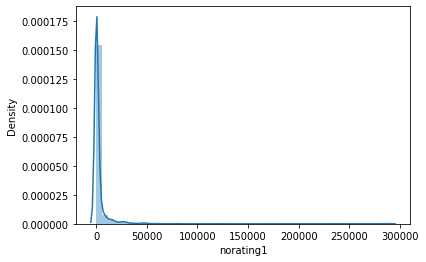

In [14]:
sns.distplot(train['norating1'])

(array([1.4831e+04, 2.1400e+02, 6.1000e+01, 8.0000e+00, 1.7000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1000e+01]),
 array([     0. ,  15119.3,  30238.6,  45357.9,  60477.2,  75596.5,
         90715.8, 105835.1, 120954.4, 136073.7, 151193. ]),
 <BarContainer object of 10 artists>)

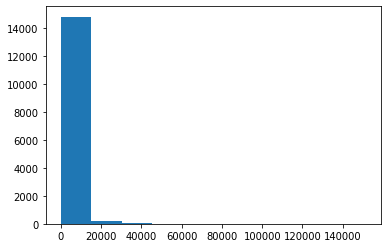

In [15]:
plt.hist(train['star_5f'])

<AxesSubplot:xlabel='star_5f', ylabel='Density'>

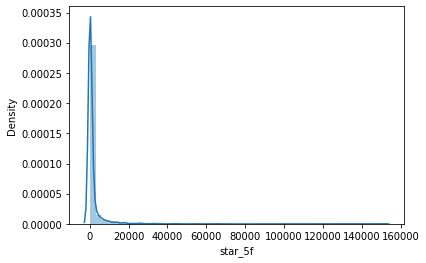

In [16]:
sns.distplot(train['star_5f'])

<AxesSubplot:xlabel='fulfilled1', ylabel='count'>

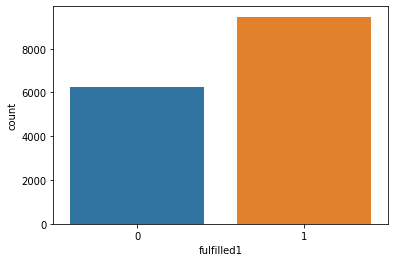

In [17]:
sns.countplot(train['fulfilled1'])

<AxesSubplot:xlabel='price1', ylabel='Density'>

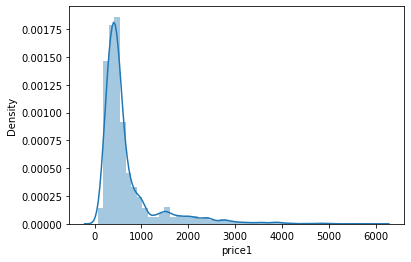

In [18]:
sns.distplot(train['price1'])

<AxesSubplot:xlabel='actprice1', ylabel='Density'>

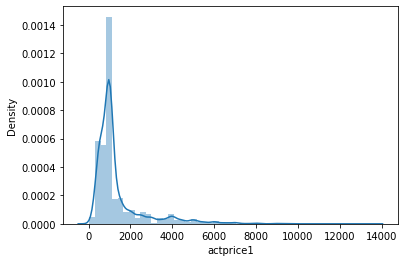

In [19]:
sns.distplot(train['actprice1'])

<AxesSubplot:xlabel='platform', ylabel='count'>

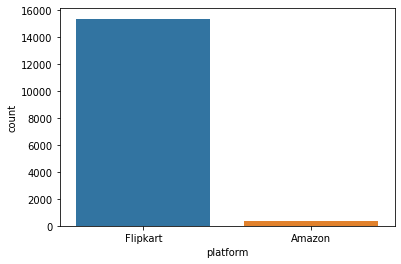

In [20]:
sns.countplot(train['platform'])

<AxesSubplot:xlabel='maincateg', ylabel='count'>

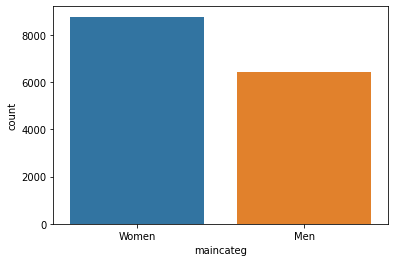

In [21]:
sns.countplot(train['maincateg'])

In [22]:
df = pd.concat([train,test],axis = 0)

In [23]:
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698.0,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3.0,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999.0,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73.0,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749.0,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0.0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518.0,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595.0,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379.0,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7.0,1


In [24]:
df.tail()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
5239,14033,Women Off White Flats Sandal,NaN,Women,Flipkart,NaN,699,NaN,1235.0,153.0,NaN,323.0,155.0,62,NaN,1
5240,297,Slip On For Men (Tan),3.9,Men,Flipkart,NaN,1993,NaN,329.0,56.0,350.0,37.0,60.0,5,37.0,0
5241,18733,Women Grey Heels Sandal,3.8,Women,Flipkart,NaN,999,NaN,1280.0,135.0,574.0,290.0,172.0,94,150.0,0
5242,6162,Womens Casual Comfort Stylish Black High Heel ...,3.9,Women,Flipkart,NaN,499,NaN,4867.0,574.0,2384.0,974.0,648.0,328,533.0,0
5243,13574,ZAPATOZ Women's Casual PU Leather Sneaker Shoes,3.9,Women,Amazon,NaN,749,NaN,8.0,5.0,28.0,0.0,0.0,0,72.0,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20974 entries, 0 to 5243
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          20974 non-null  int64  
 1   title       20974 non-null  object 
 2   Rating      20771 non-null  float64
 3   maincateg   20381 non-null  object 
 4   platform    20974 non-null  object 
 5   price1      15730 non-null  float64
 6   actprice1   20974 non-null  int64  
 7   Offer %     15730 non-null  object 
 8   norating1   20296 non-null  float64
 9   noreviews1  20396 non-null  float64
 10  star_5f     20318 non-null  float64
 11  star_4f     20435 non-null  float64
 12  star_3f     20743 non-null  float64
 13  star_2f     20974 non-null  int64  
 14  star_1f     20788 non-null  float64
 15  fulfilled1  20974 non-null  int64  
dtypes: float64(8), int64(4), object(4)
memory usage: 2.7+ MB


In [26]:
df.isnull().sum()

id               0
title            0
Rating         203
maincateg      593
platform         0
price1        5244
actprice1        0
Offer %       5244
norating1      678
noreviews1     578
star_5f        656
star_4f        539
star_3f        231
star_2f          0
star_1f        186
fulfilled1       0
dtype: int64

In [27]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())
df['norating1'] = df['norating1'].fillna(df['norating1'].mean())
df['noreviews1'] = df['noreviews1'].fillna(df['noreviews1'].mean())
df['star_5f'] = df['star_5f'].fillna(df['star_5f'].mean())
df['star_3f'] = df['star_3f'].fillna(df['star_3f'].mean())
df['star_4f'] = df['star_4f'].fillna(df['star_4f'].mean())
df['star_1f'] = df['star_1f'].fillna(df['star_1f'].mean())

In [28]:
df.isnull().sum()

id               0
title            0
Rating           0
maincateg      593
platform         0
price1        5244
actprice1        0
Offer %       5244
norating1        0
noreviews1       0
star_5f          0
star_4f          0
star_3f          0
star_2f          0
star_1f          0
fulfilled1       0
dtype: int64

In [29]:
df['maincateg'] = df['maincateg'].fillna(df['maincateg'].mode()[0])

In [30]:
df.isnull().sum()

id               0
title            0
Rating           0
maincateg        0
platform         0
price1        5244
actprice1        0
Offer %       5244
norating1        0
noreviews1       0
star_5f          0
star_4f          0
star_3f          0
star_2f          0
star_1f          0
fulfilled1       0
dtype: int64

## Log Transformation for Uniform distribution

In [31]:
df['logactprice'] = np.log(df['actprice1']+1)
df['logprice'] = np.log(df['price1']+1)

In [32]:
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,logactprice,logprice
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698.0,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3.0,0,6.907755,6.549651
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999.0,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73.0,1,7.600902,6.907755
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749.0,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0.0,1,8.517193,7.919356
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518.0,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595.0,1,6.586172,6.251904
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379.0,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7.0,1,7.740664,7.229839


In [33]:
df.drop(columns = ['title','price1','actprice1','Offer %'],axis =1,inplace = True)

In [34]:
df.head()

,id,Rating,maincateg,platform,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,logactprice,logprice
0,16695,3.9,Women,Flipkart,38.0,7.0,17.0,9.0,6.0,3,3.0,0,6.907755,6.549651
1,5120,3.8,Men,Flipkart,531.0,69.0,264.0,92.0,73.0,29,73.0,1,7.600902,6.907755
2,18391,4.4,Women,Flipkart,17.0,4.0,11.0,3.0,2.0,1,0.0,1,8.517193,7.919356
3,495,4.2,Men,Flipkart,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595.0,1,6.586172,6.251904
4,16408,3.9,Men,Flipkart,77.0,3.0,35.0,21.0,7.0,7,7.0,1,7.740664,7.229839


In [35]:
df.tail()

,id,Rating,maincateg,platform,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,logactprice,logprice
5239,14033,4.01244,Women,Flipkart,1235.0,153.0,1578.158382,323.0,155.0,62,274.258996,1,6.551080,NaN
5240,297,3.90000,Men,Flipkart,329.0,56.0,350.000000,37.0,60.0,5,37.000000,0,7.597898,NaN
5241,18733,3.80000,Women,Flipkart,1280.0,135.0,574.000000,290.0,172.0,94,150.000000,0,6.907755,NaN
5242,6162,3.90000,Women,Flipkart,4867.0,574.0,2384.000000,974.0,648.0,328,533.000000,0,6.214608,NaN
5243,13574,3.90000,Women,Amazon,8.0,5.0,28.000000,0.0,0.0,0,72.000000,1,6.620073,NaN


In [36]:
cols = ['platform','maincateg']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,id,Rating,maincateg,platform,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,logactprice,logprice
0,16695,3.9,1,1,38.0,7.0,17.0,9.0,6.0,3,3.0,0,6.907755,6.549651
1,5120,3.8,0,1,531.0,69.0,264.0,92.0,73.0,29,73.0,1,7.600902,6.907755
2,18391,4.4,1,1,17.0,4.0,11.0,3.0,2.0,1,0.0,1,8.517193,7.919356
3,495,4.2,0,1,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595.0,1,6.586172,6.251904
4,16408,3.9,0,1,77.0,3.0,35.0,21.0,7.0,7,7.0,1,7.740664,7.229839


<AxesSubplot:>

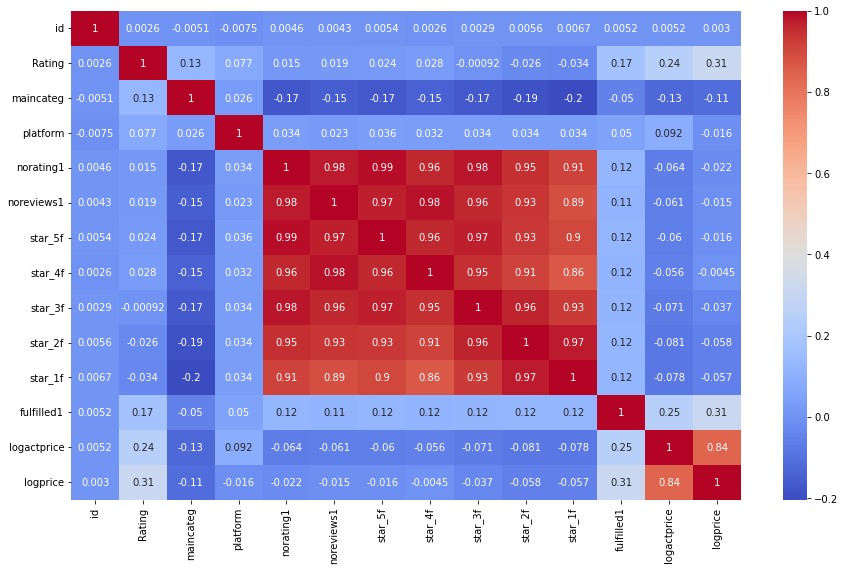

In [37]:
corr = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Train Test Split

In [38]:
train = df.iloc[: train_len, :]
test = df.iloc[train_len : , :]

In [39]:
train.shape

(15730, 14)

In [40]:
test.shape

(5244, 14)

In [41]:
X = train.drop(['logprice','id'],axis = 1)
y = train['logprice']

In [42]:
X.head()

,Rating,maincateg,platform,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,logactprice
0,3.9,1,1,38.0,7.0,17.0,9.0,6.0,3,3.0,0,6.907755
1,3.8,0,1,531.0,69.0,264.0,92.0,73.0,29,73.0,1,7.600902
2,4.4,1,1,17.0,4.0,11.0,3.0,2.0,1,0.0,1,8.517193
3,4.2,0,1,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595.0,1,6.586172
4,3.9,0,1,77.0,3.0,35.0,21.0,7.0,7,7.0,1,7.740664


In [43]:
y.head()

0    6.549651
1    6.907755
2    7.919356
3    6.251904
4    7.229839
Name: logprice, dtype: float64

## Model Training

In [44]:
def classify(model):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)
    model.fit(x_train,y_train)
    print("Accuracy is :", model.score(x_test,y_test))
    
    score = cross_val_score(model,X,y,cv = 5)
    print("Cross Validation Score is : ",np.mean(score))      

In [45]:
# Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
classify(model)

Accuracy is : 0.7430213140133275
Cross Validation Score is :  0.7357473240837233


In [46]:
# Linear Regressor
model = LinearRegression()
classify(model)

Accuracy is : 0.7491765867003686
Cross Validation Score is :  0.738853344861232


In [47]:
from xgboost import XGBRegressor
model = XGBRegressor()
classify(model)

Accuracy is : 0.8690686405577371
Cross Validation Score is :  0.8691486118567019


In [48]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
classify(model)

Accuracy is : 0.8251144862600057
Cross Validation Score is :  0.8212691698377492


In [49]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
classify(model)

Accuracy is : 0.8951875265921153
Cross Validation Score is :  0.8971712480358157


## Final Model XGBRegressor

In [50]:
model = RandomForestRegressor()
model.fit(X,y)

RandomForestRegressor()

In [51]:
test.head()

,id,Rating,maincateg,platform,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,logactprice,logprice
0,2242,3.8,0,1,27928.0,3543.0,14238.0,4295.0,3457.0,1962,3976.0,1,6.907755,NaN
1,20532,3.9,1,1,3015.0,404.0,1458.0,657.0,397.0,182,321.0,1,6.214608,NaN
2,10648,3.9,1,1,449.0,52.0,229.0,70.0,71.0,33,46.0,1,6.907755,NaN
3,20677,3.9,0,1,290.0,40.0,141.0,51.0,49.0,17,32.0,1,8.006368,NaN
4,12593,3.9,0,1,2423.0,326.0,1265.0,414.0,293.0,143,308.0,0,6.907755,NaN


In [52]:
X_test = test.drop(['logprice','id'],axis = 1)

In [53]:
X_test.head()

,Rating,maincateg,platform,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,logactprice
0,3.8,0,1,27928.0,3543.0,14238.0,4295.0,3457.0,1962,3976.0,1,6.907755
1,3.9,1,1,3015.0,404.0,1458.0,657.0,397.0,182,321.0,1,6.214608
2,3.9,1,1,449.0,52.0,229.0,70.0,71.0,33,46.0,1,6.907755
3,3.9,0,1,290.0,40.0,141.0,51.0,49.0,17,32.0,1,8.006368
4,3.9,0,1,2423.0,326.0,1265.0,414.0,293.0,143,308.0,0,6.907755


In [54]:
pred = model.predict(X_test)

In [55]:
pred[1:5]

array([5.63716787, 6.11261088, 6.71050801, 5.99296853])

In [56]:
preds = np.exp(pred)-1

In [57]:
preds[1:5]

array([279.66670748, 450.51603023, 819.98759987, 399.60204411])

In [58]:
preds = preds.astype('int64')

In [59]:
preds[1:5]

array([279, 450, 819, 399])

## Test Submission

In [60]:
sub = pd.read_csv('/kaggle/input/sa2022/Sample__submission.csv')
sub.head()

,id,price1
0,19841,193
1,19157,340
2,19445,637
3,8046,679
4,4571,190


In [61]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5244 entries, 0 to 5243
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      5244 non-null   int64
 1   price1  5244 non-null   int64
dtypes: int64(2)
memory usage: 82.1 KB


In [62]:
sub['price1'] = preds

In [63]:
sub['id'] = test['id']

In [64]:
sub.head()

,id,price1
0,2242,426
1,20532,279
2,10648,450
3,20677,819
4,12593,399


In [65]:
sub.to_csv('submission.csv',index = False)